In [99]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df_train = pd.read_csv("bigmart_train.csv")
df_test = pd.read_csv("bigmart_test.csv")

In [101]:
df_train.shape

(8523, 12)

In [102]:
df_test.shape

(5681, 11)

In [103]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df_train.duplicated().sum()

0

In [104]:
df_train.isnull().sum()
# we have missing values in 2 columns : Item_Weight & Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [105]:
df_train.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [106]:
# no of unique values in categorical columns
cat_columns = df_train.select_dtypes('object').columns
for column in cat_columns:
    print(f"Column {column},  unique values : {df_train[column].nunique()}")

Column Item_Identifier,  unique values : 1559
Column Item_Fat_Content,  unique values : 5
Column Item_Type,  unique values : 16
Column Outlet_Identifier,  unique values : 10
Column Outlet_Size,  unique values : 3
Column Outlet_Location_Type,  unique values : 3
Column Outlet_Type,  unique values : 4


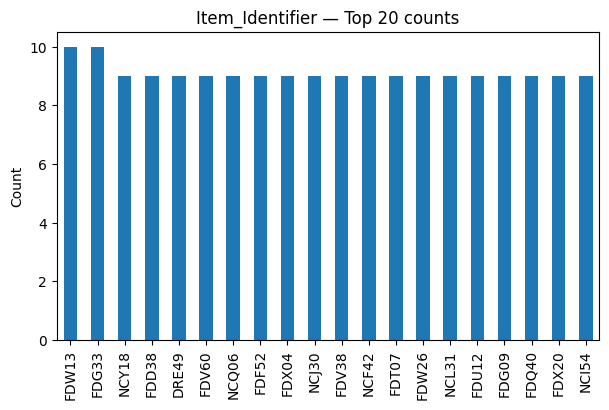

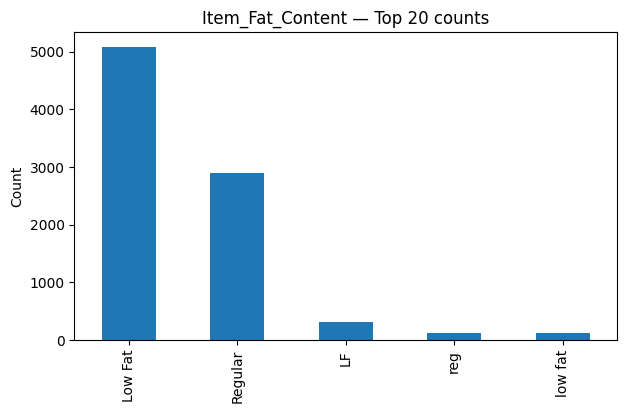

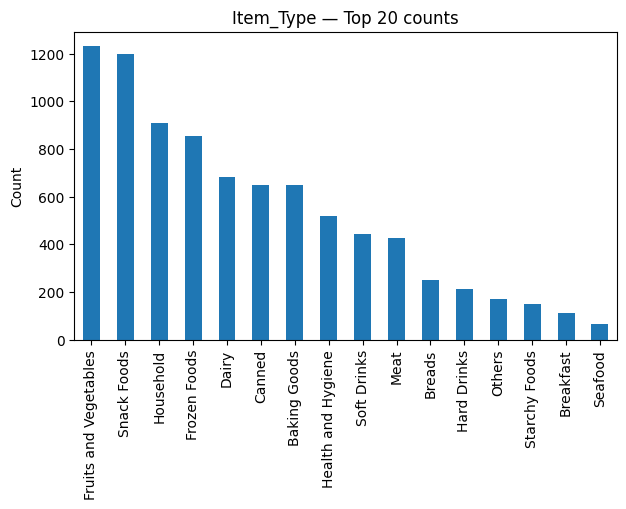

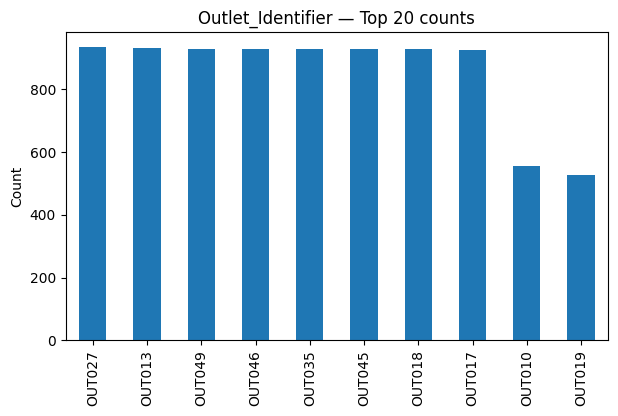

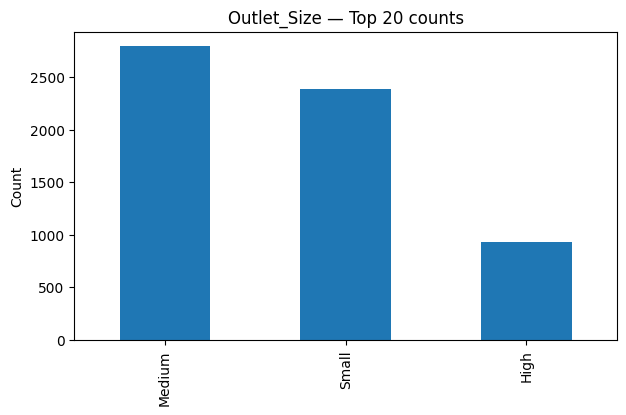

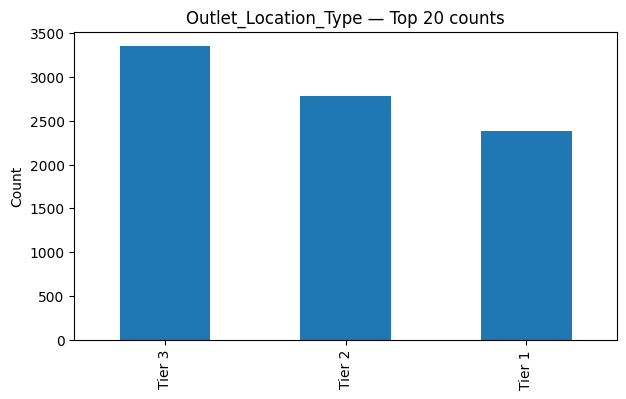

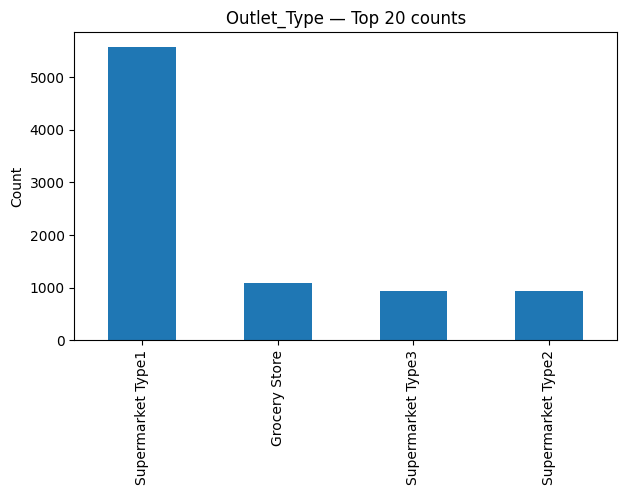

In [107]:
for c in cat_columns:
    vc = df_train[c].value_counts().head(20)
    plt.figure(figsize=(7,4))
    vc.plot(kind="bar")
    plt.title(f"{c} — Top 20 counts")
    plt.ylabel("Count")

In [108]:
#Item_Fat_Content
df_train['Item_Fat_Content'].unique()
# array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

# standardize it

df_train['Item_Fat_Content'].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)
df_train['Item_Fat_Content'].unique()

# check in test data
df_test['Item_Fat_Content'].unique()
df_test['Item_Fat_Content'].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)
df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [109]:
# Item_Type
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [110]:
# Outlet_Identifier
df_train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [111]:
print(df_train['Outlet_Size'].unique())
print(df_test['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']
['Medium' nan 'Small' 'High']


In [112]:
print(df_train['Outlet_Identifier'].unique())
print(df_test['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']


In [113]:
# Item_Type
print(df_train['Item_Type'].unique())
print(df_test['Item_Type'].unique())


['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


In [114]:
# Outlet_Location_Type
print(df_train['Outlet_Location_Type'].unique())
print(df_test['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']
['Tier 1' 'Tier 2' 'Tier 3']


In [115]:
# Outlet_Type
print(df_train['Outlet_Type'].unique())
print(df_test['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


# Above comparision confirms test set does not contain some surprising or new values which are not present in train set

Text(0, 0.5, 'Frequency')

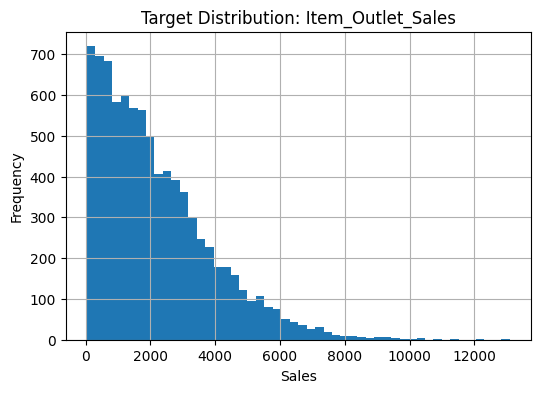

In [116]:
# Target distribution
plt.figure(figsize=(6,4))
df_train['Item_Outlet_Sales'].hist(bins=50)
plt.title("Target Distribution: Item_Outlet_Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")

# Observation : looks like right skewed distribution

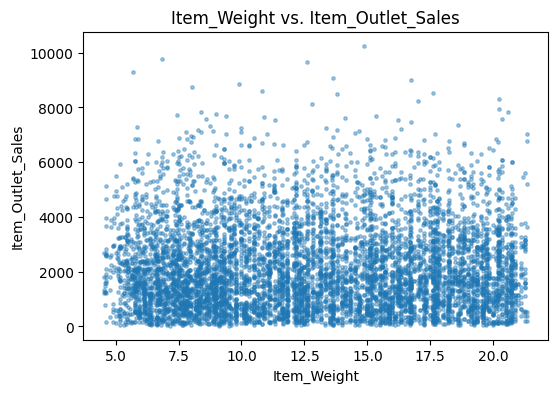

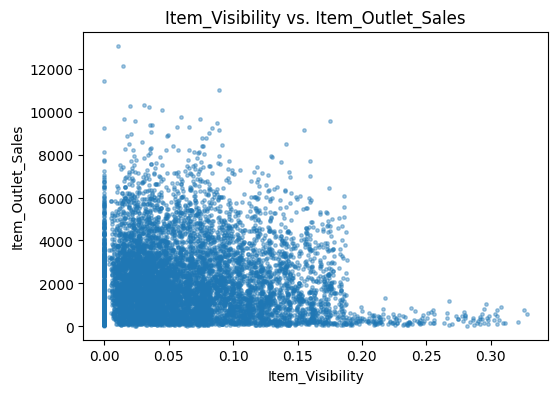

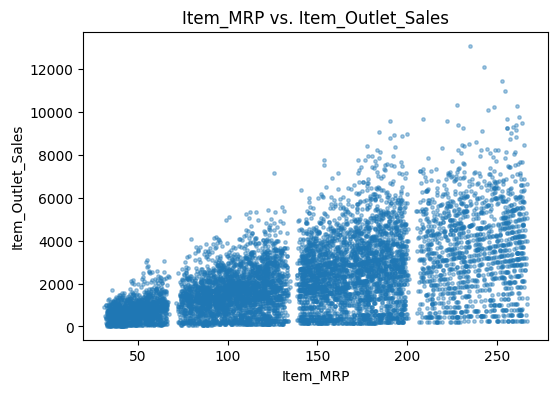

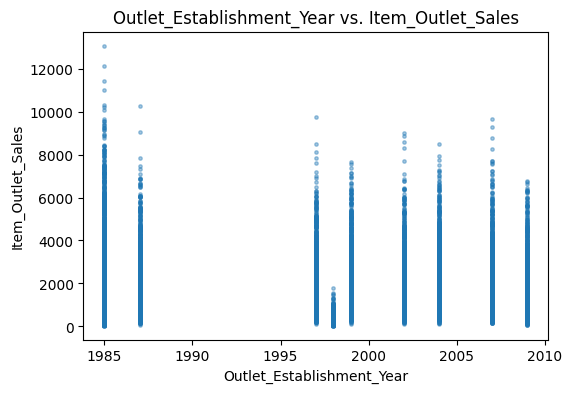

In [117]:
TARGET = 'Item_Outlet_Sales'
num_cols = [c for c in df_train.columns if pd.api.types.is_numeric_dtype(df_train[c]) and c != 'Item_Outlet_Sales']
for c in [col for col in num_cols if col in df_train.columns]:
    fig = plt.figure(figsize=(6,4))
    plt.scatter(df_train[c], df_train[TARGET], s=6, alpha=0.4)
    plt.title(f"{c} vs. {TARGET}")
    plt.xlabel(c)
    plt.ylabel(TARGET)

In [118]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: ylabel='Density'>

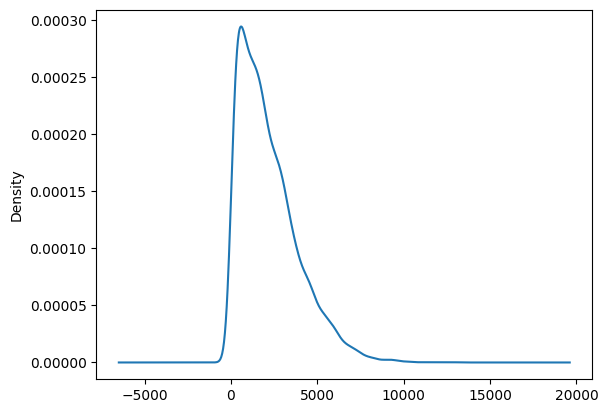

In [119]:
df_train['Item_Outlet_Sales'].plot(kind='kde')

<Axes: ylabel='Density'>

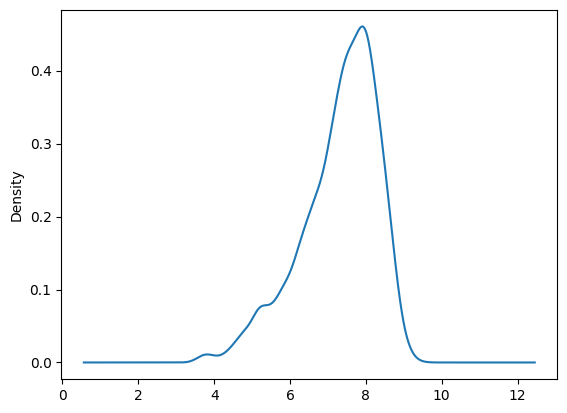

In [120]:
# applying log on it
np.log1p(df_train['Item_Outlet_Sales']).plot(kind='kde')

# Missing Value Imputation

In [121]:
# Item_Weight
df_grp_item_identifier = df_train.groupby("Item_Identifier")["Item_Weight"].agg(['count','mean', 'max']).reset_index()

In [122]:
item_identifier_nan = df_train[df_train['Item_Weight'].isnull()]['Item_Identifier'].unique()

In [123]:
df_grp_item_identifier[df_grp_item_identifier['Item_Identifier'].isin(item_identifier_nan)]

,Item_Identifier,count,mean,max
1,DRA24,5,19.350,19.350
2,DRA59,6,8.270,8.270
3,DRB01,2,7.390,7.390
6,DRB25,5,12.300,12.300
7,DRB48,6,16.750,16.750
...,...,...,...,...
1551,NCZ17,5,12.150,12.150
1552,NCZ18,6,7.825,7.825
1554,NCZ30,6,6.590,6.590
1557,NCZ53,4,9.600,9.600


In [124]:
# this step confirms that item weight is same at the item identifier level
# so we can fill the null values in item weight column by single unique value of item weight for 
# that respective item identifier

In [125]:
id_mean_map = df_train.groupby("Item_Identifier")["Item_Weight"].max()
df_train["Item_Weight"] = df_train["Item_Weight"].fillna(df_train["Item_Identifier"].map(id_mean_map))
if df_train["Item_Weight"].isna().any():
    df_train["Item_Weight"] = df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean())

In [126]:
df_test["Item_Weight"] = df_test["Item_Weight"].fillna(df_test["Item_Identifier"].map(id_mean_map))
if df_test["Item_Weight"].isna().any():
    df_test["Item_Weight"] = df_test["Item_Weight"].fillna(df_train["Item_Weight"].mean())

In [127]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [128]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [129]:
# 2. Outlet_Size
# Trying to find pattern between outlet size and outlet location type, outlet type
pd.crosstab([df_train['Outlet_Location_Type'], df_train['Outlet_Type']], df_train['Outlet_Size'])

Outlet_Size                             High  Medium  Small
Outlet_Location_Type Outlet_Type                           
Tier 1               Grocery Store         0       0    528
                     Supermarket Type1     0     930    930
Tier 2               Supermarket Type1     0       0    930
Tier 3               Supermarket Type1   932       0      0
                     Supermarket Type2     0     928      0
                     Supermarket Type3     0     935      0

In [ ]:
# It appears, If it is tier 1 and grocery store, size is Small
# If it is Tier3 and Supermarket type 1, then size is high
# If it is Tier3 and Supermarket type 2 & 3, then size is medium
# If tier 2 , size is small
# If tier 1 and Supermarket type 1, it is equally distributed between small and medium

In [130]:
mappings = {
    ("Grocery Store",      "Tier 1"): "Small",
    ("Supermarket Type1",  "Tier 1"): "Medium",
    ("Supermarket Type1",  "Tier 2"): "Small",
    ("Supermarket Type1",  "Tier 3"): "High",
    ("Supermarket Type2",  "Tier 3"): "Medium",
    ("Supermarket Type3",  "Tier 3"): "Medium",
}
def impute_outlet_size(df):
    out = df.copy()
    m = out["Outlet_Size"].isna()

    keys = pd.Series(
        list(zip(out.loc[m, "Outlet_Type"], out.loc[m, "Outlet_Location_Type"])),
        index=out.loc[m].index
    )
    out.loc[m, "Outlet_Size"] = keys.map(mappings)

    return out

In [131]:
df_train['Outlet_Size'].mode().values[0]

'Medium'

In [132]:
df_train = impute_outlet_size(df_train)
df_test  = impute_outlet_size(df_test)

df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode().values[0], inplace=True)
df_test['Outlet_Size'].fillna(df_train['Outlet_Size'].mode().values[0], inplace=True)

In [133]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [134]:
def label_encode_train_test(X_train: pd.DataFrame, X_test: pd.DataFrame):
    """Label-encode object columns using TRAIN-only mapping; unknowns → -1."""
    X_le = X_train.copy()
    Xtest_le = X_test.copy()
    cat_cols = [c for c in X_train.columns if X_train[c].dtype == "object"]
    maps = {}
    for c in cat_cols:
        vals = pd.Index(X_train[c].astype(str).unique())
        mapping = {v:i for i,v in enumerate(vals)}
        maps[c] = mapping
        X_le[c] = X_train[c].astype(str).map(mapping).fillna(-1).astype(int)
        Xtest_le[c] = X_test[c].astype(str).map(mapping).fillna(-1).astype(int)
    return X_le, Xtest_le, cat_cols

In [135]:
ID_COLS = ["Item_Identifier","Outlet_Identifier"]
TARGET = "Item_Outlet_Sales"
#feature_cols = [c for c in df_train.columns if c not in ID_COLS + [TARGET]]
feature_cols = [c for c in df_train.columns if c not in  [TARGET]]
X_train  = df_train[feature_cols].copy()
y_train  = df_train[TARGET].copy()
X_test = df_test[feature_cols].copy()

In [136]:
X_train, X_test, cat_cols = label_encode_train_test(X_train, X_test)

In [139]:
# CatBoost native categorical indices
cb_cat_idx = [X_train.columns.get_loc(c) for c in cat_cols]

In [140]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
import optuna

# Baseline Model
# Random Forest

In [79]:
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

In [82]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with cross-validation (using negative MSE, then converting to RMSE)
scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())

RMSE scores for each fold: [1084.9220955  1111.40862919 1136.90658105 1151.65040761 1162.56748319]
Mean RMSE: 1129.491039307727
Standard deviation of RMSE: 28.119186727116038


In [ ]:
# function to make predictions on bigmart test data
def predict_on_test_data(model, comment=None):
    file_name = "bigmart_predictions_" + comment + ".csv"
    y_pred = model.predict(X_test)
    sub = df_test[ID_COLS].copy()
    sub["Item_Outlet_Sales"] = y_pred
    sub.to_csv(file_name, index=False)

In [91]:
# Hyperparameter tuning on RF
def objective(trial: optuna.Trial) -> float:
    # Search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 40),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.5, 0.7, 0.9]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42,
        "n_jobs": -1,
    }

    model = RandomForestRegressor(**params)

    scores = cross_val_score(
        model, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error", n_jobs=-1
    )
    rmse = -scores.mean()  # lower is better
    return rmse

# ---- Optimize ----
study = optuna.create_study(direction="minimize", study_name="rf_regressor_opt")
study.optimize(objective, n_trials=200, show_progress_bar=False)

print("Best RMSE (CV):", study.best_value)
print("Best hyperparameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# ---- Refit final model on all data with best params ----
best_model = RandomForestRegressor(**{**study.best_params, "random_state": 42, "n_jobs": -1})
best_model.fit(X_train, y_train)


cv_scores = cross_val_score(
    best_model, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error", n_jobs=-1
)
print("RMSE per fold with best params:", -cv_scores)
print("Mean RMSE with best params:", -cv_scores.mean())

[I 2025-08-14 14:49:39,991] A new study created in memory with name: rf_regressor_opt
[I 2025-08-14 14:49:43,044] Trial 0 finished with value: 1080.1267623294036 and parameters: {'n_estimators': 650, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 0.7, 'bootstrap': True}. Best is trial 0 with value: 1080.1267623294036.
[I 2025-08-14 14:49:47,787] Trial 1 finished with value: 1086.768539648707 and parameters: {'n_estimators': 800, 'max_depth': 33, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 0.7, 'bootstrap': True}. Best is trial 0 with value: 1080.1267623294036.
[I 2025-08-14 14:49:49,554] Trial 2 finished with value: 1098.6497752149521 and parameters: {'n_estimators': 200, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 0.9, 'bootstrap': True}. Best is trial 0 with value: 1080.1267623294036.
[I 2025-08-14 14:49:54,019] Trial 3 finished with value: 1120.6040253789365 and parameters: {'n_estimators': 600,

Best RMSE (CV): 1077.2638121684984
Best hyperparameters:
  n_estimators: 400
  max_depth: 7
  min_samples_split: 17
  min_samples_leaf: 7
  max_features: 0.7
  bootstrap: True
RMSE per fold with best params: [1014.08418401 1071.81342285 1074.28969075 1109.5795436  1116.55221963]
Mean RMSE with best params: 1077.2638121684984


In [93]:
predict_on_test_data(model=best_model, comment="rf_hp_new")

# Catboost Regressor

In [141]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial: optuna.Trial) -> float:
    # Search space
    params = {
        "loss_function": "RMSE",
        "n_estimators": trial.suggest_int("n_estimators", 300, 2000, step=100),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 0.0, 2.0),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "random_state": 42,
        "verbose": 0,
        "allow_writing_files": False,
        "thread_count": -1,
    }

    # Conditional params based on bootstrap_type
    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0.0, 10.0)
    elif params["bootstrap_type"] in ["Bernoulli", "MVS"]:
        params["subsample"] = trial.suggest_float("subsample", 0.5, 1.0)

    params['cat_features'] = cb_cat_idx

    model = CatBoostRegressor(**params)

    # Use negative RMSE scorer directly (sklearn ≥0.22)
    scores = cross_val_score(
        model, X_train, y_train,
        cv=kf,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    rmse = -scores.mean()  # lower is better
    return rmse

# ---- Optimize ----
study = optuna.create_study(direction="minimize", study_name="catboost_regressor_opt")
study.optimize(objective, n_trials=100, show_progress_bar=False)

print("Best RMSE (CV):", study.best_value)
print("Best hyperparameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# ---- Refit final model on all data with best params ----
best_params = {**study.best_params,
               "loss_function": "RMSE",
               "random_state": 42,
               "verbose": 0,
               "allow_writing_files": False,
               "thread_count": -1}

best_model = CatBoostRegressor(**best_params)
if cb_cat_idx is not None:
    best_model.fit(X_train, y_train, cat_features=cb_cat_idx)
else:
    best_model.fit(X_train, y_train)

# (Optional) Re-evaluate with CV using best params for a fair estimate:
cv_scores = cross_val_score(
    best_model, X_train, y_train,
    cv=kf,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
print("RMSE per fold with best params:", -cv_scores)
print("Mean RMSE with best params:", -cv_scores.mean())
print("Std RMSE with best params:", cv_scores.std())

[I 2025-08-14 17:00:56,708] A new study created in memory with name: catboost_regressor_opt
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this va

Best RMSE (CV): 1073.8796520208973
Best hyperparameters:
  n_estimators: 2000
  depth: 5
  learning_rate: 0.003478529521574649
  l2_leaf_reg: 2.0099240163498164
  random_strength: 0.6052356132826169
  bootstrap_type: Bernoulli
  subsample: 0.8562604288091719
RMSE per fold with best params: [1018.58124332 1075.66935992 1063.7551968  1108.73765695 1117.85789899]
Mean RMSE with best params: 1076.9202711956443
Std RMSE with best params: 35.40215118379957


In [143]:
predict_on_test_data(model=best_model, comment="cat_hp_new_features")

# Xgboost regressor

In [97]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial: optuna.Trial) -> float:
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 2000, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "min_child_weight": trial.suggest_float("min_child_weight", 1.0, 10.0, log=True),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 1.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "random_state": 42,
        "n_jobs": -1,
        "objective": "reg:squarederror",
        "tree_method": trial.suggest_categorical("tree_method", ["hist"]),
        "verbosity": 0,
    }

    model = XGBRegressor(**params)

    # Use negative RMSE scorer directly (sklearn ≥0.22)
    scores = cross_val_score(
        model, X_train, y_train,
        cv=kf,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    rmse = -scores.mean()  # lower is better
    return rmse

# ---- Optimize ----
study = optuna.create_study(direction="minimize", study_name="xgb_regressor_opt")
study.optimize(objective, n_trials=100, show_progress_bar=False)

print("Best RMSE (CV):", study.best_value)
print("Best hyperparameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# ---- Refit final model on all data with best params ----
best_params = {
    **study.best_params,
    "objective": "reg:squarederror",
    "random_state": 42,
    "n_jobs": -1,
    "verbosity": 0,
}
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# (Optional) Re-evaluate with CV using the best params for a fair estimate:
cv_scores = cross_val_score(
    best_model, X_train, y_train,
    cv=kf,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
print("RMSE per fold with best params:", -cv_scores)
print("Mean RMSE with best params:", -cv_scores.mean())
print("Std RMSE with best params:", cv_scores.std())

[I 2025-08-14 15:25:21,750] A new study created in memory with name: xgb_regressor_opt
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validat

Best RMSE (CV): 1079.0139416851102
Best hyperparameters:
  n_estimators: 1400
  max_depth: 4
  learning_rate: 0.0030214955263591836
  subsample: 0.9151033363105678
  colsample_bytree: 0.966326396503843
  colsample_bylevel: 0.9963554762290385
  min_child_weight: 4.590098413660923
  gamma: 0.015419583780377
  reg_alpha: 7.772768344239538e-05
  reg_lambda: 0.05367328542244185
  tree_method: hist
RMSE per fold with best params: [1019.61921782 1071.93583876 1070.01137622 1115.47920478 1118.02407084]
Mean RMSE with best params: 1079.0139416851102
Std RMSE with best params: 36.08430278727137


In [98]:
predict_on_test_data(model=best_model, comment="xg_hp")